# DATA101 Final Project: Interactive Visualization Application
## Part 3: Spatial Data Visualization

## Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import shapely

from pathlib import Path
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Import Datasets

In [4]:
dataset_folder = Path('cleaned-datasets/')

In [5]:
# Primary Completion Rates
primary_completion = pd.read_csv(dataset_folder / 'Primary/' 'Primary_Completion_Rate_by_Region_and_Year.csv')

# Primary Drop-out Rates
primary_dropout = pd.read_csv(dataset_folder / 'Primary/' 'Primary_Drop-out_Rate_by_Region_and_Year.csv')

# Primary Net Enrollment Rates
primary_enrollment = pd.read_csv(dataset_folder / 'Primary/' 'Primary_Net_Enrollment_Rate_by_Region_and_Year.csv')

# Secondary Completion Rates
secondary_completion = pd.read_csv(dataset_folder / 'Secondary/' 'Secondary_Completion_Rate_by_Region_and_Year.csv')

# Secondary Drop-out Rates
secondary_dropout = pd.read_csv(dataset_folder / 'Secondary/' 'Secondary_Drop-out_Rate_by_Region_and_Year.csv')

# Secondary Net Enrollment Rates
secondary_enrollment = pd.read_csv(dataset_folder / 'Secondary/' 'Secondary_Enrollment_Rate_by_Region_and_Year.csv')

# Poverty Incidence Rates
poverty_incidence = pd.read_csv(dataset_folder / 'Interpolated_Poverty_Incidence_among_Population.csv')

In [36]:
primary_completion

,Region,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NCR,88.5,85.3,85.3,79.7,82.9,83.1,80.0,78.7,74.7,82.3
1,CAR,75.0,71.7,75.8,77.1,71.8,78.9,78.2,82.6,86.4,86.2
2,Region I,81.6,82.7,84.8,83.1,82.8,82.4,85.2,91.1,94.5,91.5
3,Region II,78.5,78.1,80.4,78.3,77.5,73.1,82.0,87.9,87.1,89.0
4,Region III,82.2,80.7,81.4,81.9,80.2,80.3,82.6,90.8,88.9,89.1
5,Region IV-A,81.8,79.3,81.6,84.8,82.1,85.4,84.8,72.5,92.3,88.5
6,Region IV-B,70.0,68.1,71.6,69.4,72.9,72.4,74.2,78.1,86.9,90.2
7,Region V,73.0,74.4,74.4,74.4,74.5,74.8,76.8,85.0,86.3,85.4
8,Region VI,70.6,71.9,72.6,72.5,71.2,74.6,78.6,85.7,90.1,88.9
9,Region VII,77.8,78.4,78.8,76.8,76.6,80.4,80.9,85.8,86.1,88.5


Import Philippine region shapefile data

In [6]:
ph_reg = gpd.read_file(dataset_folder / 'Spatial/PH_Adm/PH_Adm1_Regions.shp.shp')

In [28]:
ph_reg.columns

Index(['adm1_psgc', 'adm1_en', 'geo_level', 'len_crs', 'area_crs', 'len_km',
       'area_km2', 'geometry'],
      dtype='object')

In [7]:
ph_reg.drop(columns=['adm1_psgc', 'geo_level', 'len_crs', 'area_crs', 'len_km', 'area_km2'], inplace=True)

In [8]:
ph_reg.columns

Index(['adm1_en', 'geometry'], dtype='object')

In [11]:
ph_reg['adm1_en'][16]

'Bangsamoro Autonomous Region In Muslim Mindanao (BARMM)'

Testing geospatial plotting

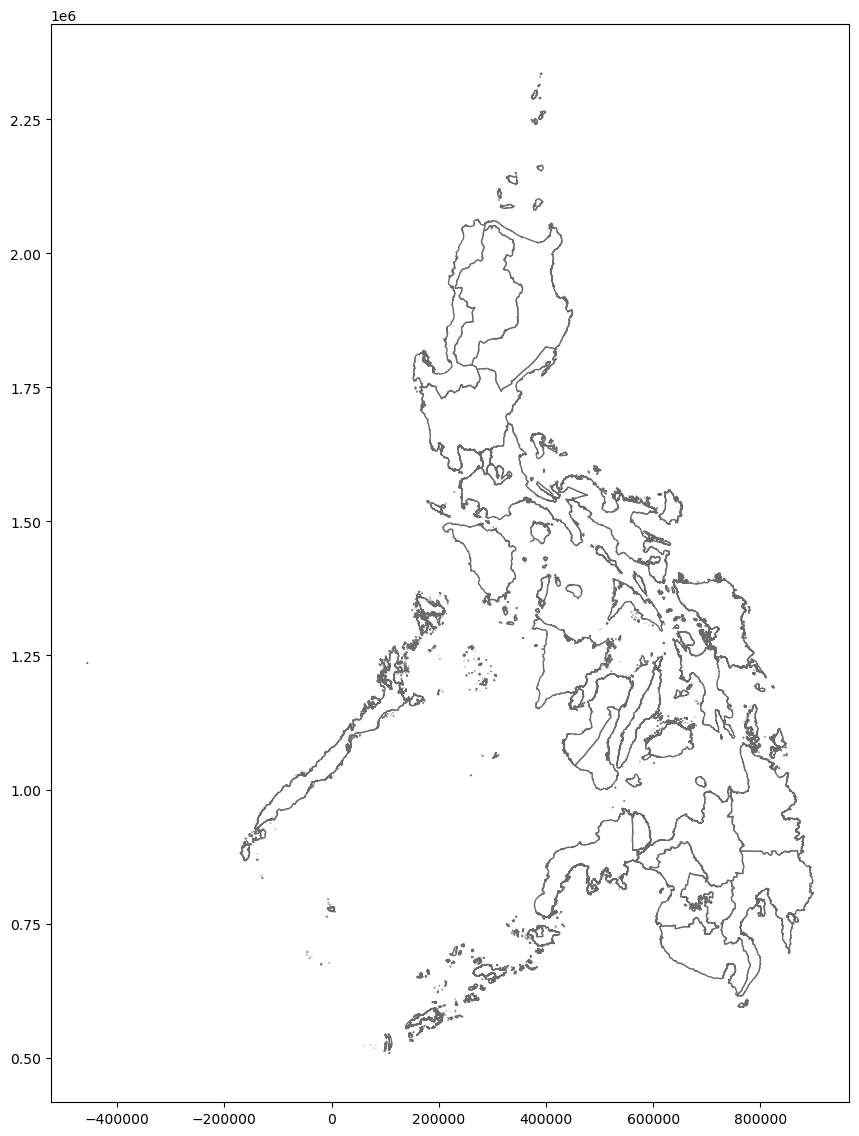

In [32]:
ax = ph_reg.plot(figsize=(20, 14), color='white', edgecolor='dimgray')

## Mapping region polygon to dataset

### Mapping datasets to full region name 

In [12]:
region_mapping = {
    'NCR': 'National Capital Region (NCR)',
    'CAR': 'Cordillera Administrative Region (CAR)',
    'Region I': 'Region I (Ilocos Region)', 
    'Region II': 'Region II (Cagayan Valley)', 
    'Region III': 'Region III (Central Luzon)', 
    'Region IV-A': 'Region IV-A (CALABARZON)', 
    'Region IV-B': 'MIMAROPA Region', 
    'Region V': 'Region V (Bicol Region)', 
    'Region VI': 'Region VI (Western Visayas)', 
    'Region VII': 'Region VII (Central Visayas)', 
    'Region VIII': 'Region VIII (Eastern Visayas)', 
    'Region IX': 'Region IX (Zamboanga Peninsula)', 
    'Region X': 'Region X (Northern Mindanao)', 
    'Region XI': 'Region XI (Davao Region)', 
    'Region XII': 'Region XII (SOCCSKSARGEN)', 
    'Caraga': 'Region XIII (Caraga)', 
    'ARMM': 'Bangsamoro Autonomous Region In Muslim Mindanao (BARMM)'
}


In [13]:
df_list = [primary_completion, primary_dropout, primary_enrollment, secondary_completion, secondary_dropout, secondary_enrollment]
# Iterate over each DataFrame in the list
for df in df_list:
    df['adm1_en'] = df['Region'].map(region_mapping)
    

In [53]:
ph_reg

,adm1_en,geometry
0,Region I (Ilocos Region),"MULTIPOLYGON (((285928.399 2055561.259, 285954..."
1,Region II (Cagayan Valley),"MULTIPOLYGON (((390824.572 2333905.124, 390822..."
2,Region III (Central Luzon),"MULTIPOLYGON (((418263.080 1822987.298, 418262..."
3,Region IV-A (CALABARZON),"MULTIPOLYGON (((425287.448 1559120.357, 425305..."
4,Region V (Bicol Region),"MULTIPOLYGON (((498716.968 1296785.638, 498718..."
5,Region VI (Western Visayas),"MULTIPOLYGON (((329645.838 1349922.968, 329647..."
6,Region VII (Central Visayas),"MULTIPOLYGON (((619199.941 1274054.134, 619188..."
7,Region VIII (Eastern Visayas),"MULTIPOLYGON (((648513.417 1403953.256, 648510..."
8,Region IX (Zamboanga Peninsula),"MULTIPOLYGON (((545396.693 978665.920, 545381...."
9,Region X (Northern Mindanao),"MULTIPOLYGON (((686608.730 1023695.375, 686614..."


In [14]:
primary_enrollment

,Region,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,adm1_en
0,NCR,73.21,72.53,71.95,71.21,96.90,97.16,94.42,92.54,89.67,88.13,National Capital Region (NCR)
1,CAR,72.68,71.20,71.21,75.31,97.64,99.58,97.30,95.51,94.53,92.18,Cordillera Administrative Region (CAR)
2,Region I,76.46,74.87,74.33,82.20,98.32,98.89,97.38,96.81,96.84,95.39,Region I (Ilocos Region)
3,Region II,73.98,71.69,70.19,75.74,95.34,96.07,96.02,96.49,96.32,96.31,Region II (Cagayan Valley)
4,Region III,78.76,78.06,77.69,76.43,98.04,98.55,96.74,96.22,95.64,93.85,Region III (Central Luzon)
5,Region IV-A,79.10,78.43,78.08,71.67,93.94,95.69,95.01,92.47,92.03,89.94,Region IV-A (CALABARZON)
6,Region IV-B,80.76,78.90,79.89,85.20,95.04,97.63,95.52,93.52,92.33,92.25,MIMAROPA Region
7,Region V,81.19,80.57,80.01,89.06,97.19,98.55,96.79,95.50,94.02,91.09,Region V (Bicol Region)
8,Region VI,71.68,69.96,69.11,75.34,93.38,95.56,95.43,95.83,95.79,95.43,Region VI (Western Visayas)
9,Region VII,73.43,72.65,73.51,76.09,95.48,97.38,97.43,97.36,96.75,96.02,Region VII (Central Visayas)


### Mapping to Shapefile with GPD

In [15]:
p_enrollment_merged = pd.merge(primary_enrollment, ph_reg, on='adm1_en', how='inner')
p_completion_merged = pd.merge(primary_completion, ph_reg, on='adm1_en', how='inner')
p_dropout_merged = pd.merge(primary_dropout, ph_reg, on='adm1_en', how='inner')
s_enrollment_merged = pd.merge(secondary_enrollment, ph_reg, on='adm1_en', how='inner')
s_completion_merged = pd.merge(secondary_completion, ph_reg, on='adm1_en', how='inner')
s_dropout_merged = pd.merge(secondary_dropout, ph_reg, on='adm1_en', how='inner')

In [35]:
p_enrollment_merged['geometry'].dtype

## Transform dataset into GeoPandaDataframe

In [36]:
p_enrollment_gpd = gpd.GeoDataFrame(p_enrollment_merged, geometry='geometry')

In [39]:
p_completion_gpd = gpd.GeoDataFrame(p_completion_merged, geometry='geometry')
p_dropout_gpd = gpd.GeoDataFrame(p_dropout_merged, geometry='geometry')
s_enrollment_gpd = gpd.GeoDataFrame(s_enrollment_merged, geometry='geometry')
s_completion_gpd = gpd.GeoDataFrame(s_completion_merged, geometry='geometry')
s_dropout_gpd = gpd.GeoDataFrame(s_dropout_merged, geometry='geometry')

<Axes: >

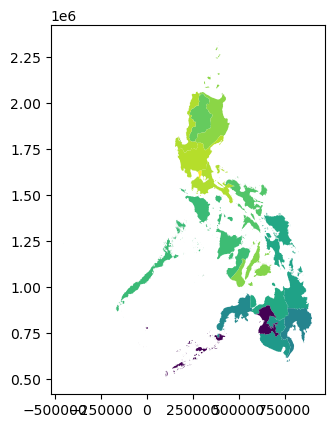

In [40]:
p_completion_gpd.plot(column='2006')

<Axes: >

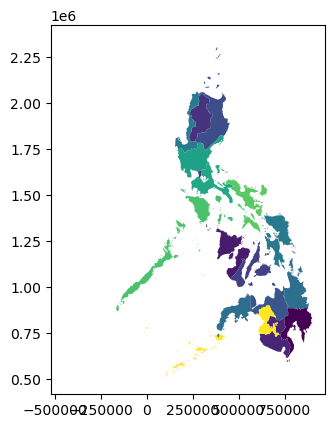

In [38]:
p_enrollment_gpd.plot(column='2006')

In [17]:
p_completion_merged

,Region,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,adm1_en,geometry
0,NCR,88.5,85.3,85.3,79.7,82.9,83.1,80.0,78.7,74.7,82.3,National Capital Region (NCR),"POLYGON ((295432.405 1633664.936, 295432.256 1..."
1,CAR,75.0,71.7,75.8,77.1,71.8,78.9,78.2,82.6,86.4,86.2,Cordillera Administrative Region (CAR),"POLYGON ((261483.443 1792136.851, 261477.892 1..."
2,Region I,81.6,82.7,84.8,83.1,82.8,82.4,85.2,91.1,94.5,91.5,Region I (Ilocos Region),"MULTIPOLYGON (((285928.399 2055561.259, 285954..."
3,Region II,78.5,78.1,80.4,78.3,77.5,73.1,82.0,87.9,87.1,89.0,Region II (Cagayan Valley),"MULTIPOLYGON (((390824.572 2333905.124, 390822..."
4,Region III,82.2,80.7,81.4,81.9,80.2,80.3,82.6,90.8,88.9,89.1,Region III (Central Luzon),"MULTIPOLYGON (((418263.080 1822987.298, 418262..."
5,Region IV-A,81.8,79.3,81.6,84.8,82.1,85.4,84.8,72.5,92.3,88.5,Region IV-A (CALABARZON),"MULTIPOLYGON (((425287.448 1559120.357, 425305..."
6,Region IV-B,70.0,68.1,71.6,69.4,72.9,72.4,74.2,78.1,86.9,90.2,MIMAROPA Region,"MULTIPOLYGON (((180622.264 1534932.726, 180618..."
7,Region V,73.0,74.4,74.4,74.4,74.5,74.8,76.8,85.0,86.3,85.4,Region V (Bicol Region),"MULTIPOLYGON (((498716.968 1296785.638, 498718..."
8,Region VI,70.6,71.9,72.6,72.5,71.2,74.6,78.6,85.7,90.1,88.9,Region VI (Western Visayas),"MULTIPOLYGON (((329645.838 1349922.968, 329647..."
9,Region VII,77.8,78.4,78.8,76.8,76.6,80.4,80.9,85.8,86.1,88.5,Region VII (Central Visayas),"MULTIPOLYGON (((619199.941 1274054.134, 619188..."


In [18]:
p_dropout_merged

,Region,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,adm1_en,geometry
0,NCR,2.37,2.83,2.92,4.07,3.31,2.93,4.10,4.36,4.25,2.05,National Capital Region (NCR),"POLYGON ((295432.405 1633664.936, 295432.256 1..."
1,CAR,5.67,6.41,5.49,5.04,6.00,4.91,4.79,3.75,2.84,1.90,Cordillera Administrative Region (CAR),"POLYGON ((261483.443 1792136.851, 261477.892 1..."
2,Region I,3.93,3.76,3.09,3.60,3.78,3.36,3.10,1.92,1.13,1.13,Region I (Ilocos Region),"MULTIPOLYGON (((285928.399 2055561.259, 285954..."
3,Region II,4.72,4.95,4.30,4.81,4.95,4.73,3.93,2.42,2.61,1.74,Region II (Cagayan Valley),"MULTIPOLYGON (((390824.572 2333905.124, 390822..."
4,Region III,3.69,3.97,3.94,3.72,4.15,4.07,3.71,1.90,2.28,1.45,Region III (Central Luzon),"MULTIPOLYGON (((418263.080 1822987.298, 418262..."
5,Region IV-A,3.90,4.41,3.87,2.57,3.75,2.46,3.26,6.03,1.55,1.76,Region IV-A (CALABARZON),"MULTIPOLYGON (((425287.448 1559120.357, 425305..."
6,Region IV-B,6.70,7.40,6.40,6.93,6.25,6.13,5.87,4.73,2.78,1.66,MIMAROPA Region,"MULTIPOLYGON (((180622.264 1534932.726, 180618..."
7,Region V,6.06,5.78,5.90,5.80,5.79,5.70,5.35,3.19,2.72,2.54,Region V (Bicol Region),"MULTIPOLYGON (((498716.968 1296785.638, 498718..."
8,Region VI,6.38,6.14,6.03,6.05,6.56,5.64,4.80,2.91,1.97,1.76,Region VI (Western Visayas),"MULTIPOLYGON (((329645.838 1349922.968, 329647..."
9,Region VII,5.00,4.65,4.59,4.78,4.82,4.23,4.19,2.88,2.68,1.85,Region VII (Central Visayas),"MULTIPOLYGON (((619199.941 1274054.134, 619188..."


In [19]:
s_enrollment_merged

,Region,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,adm1_en,geometry
0,NCR,55.65,55.37,56.08,40.22,79.57,77.83,77.46,76.47,72.39,75.49,National Capital Region (NCR),"POLYGON ((295432.405 1633664.936, 295432.256 1..."
1,CAR,39.49,38.38,37.04,58.15,63.70,67.22,68.29,68.62,68.15,71.32,Cordillera Administrative Region (CAR),"POLYGON ((261483.443 1792136.851, 261477.892 1..."
2,Region I,52.83,52.81,51.61,57.16,76.40,75.57,76.14,77.40,75.85,79.44,Region I (Ilocos Region),"MULTIPOLYGON (((285928.399 2055561.259, 285954..."
3,Region II,46.25,45.53,44.59,50.76,69.61,68.94,68.46,68.66,66.90,70.21,Region II (Cagayan Valley),"MULTIPOLYGON (((390824.572 2333905.124, 390822..."
4,Region III,49.91,50.03,50.65,50.34,74.40,73.53,73.11,74.34,72.83,75.47,Region III (Central Luzon),"MULTIPOLYGON (((418263.080 1822987.298, 418262..."
5,Region IV-A,51.69,51.73,52.10,48.59,70.28,71.21,71.03,70.43,68.60,72.60,Region IV-A (CALABARZON),"MULTIPOLYGON (((425287.448 1559120.357, 425305..."
6,Region IV-B,47.39,47.48,48.02,49.75,59.95,61.15,62.21,62.78,62.55,68.94,MIMAROPA Region,"MULTIPOLYGON (((180622.264 1534932.726, 180618..."
7,Region V,45.87,46.01,45.49,49.49,57.77,60.61,60.87,63.63,63.14,69.51,Region V (Bicol Region),"MULTIPOLYGON (((498716.968 1296785.638, 498718..."
8,Region VI,45.21,44.63,44.52,47.52,61.36,61.53,61.20,62.11,60.94,68.66,Region VI (Western Visayas),"MULTIPOLYGON (((329645.838 1349922.968, 329647..."
9,Region VII,39.75,39.32,40.27,42.68,61.46,60.34,62.44,65.67,64.55,71.49,Region VII (Central Visayas),"MULTIPOLYGON (((619199.941 1274054.134, 619188..."


In [20]:
s_completion_merged

,Region,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,adm1_en,geometry
0,NCR,71.6,78.7,79.6,75.8,75.9,79.1,76.7,76.3,77.3,74.2,National Capital Region (NCR),"POLYGON ((295432.405 1633664.936, 295432.256 1..."
1,CAR,83.7,75.7,82.4,63.4,75.2,80.0,78.4,76.3,76.9,70.0,Cordillera Administrative Region (CAR),"POLYGON ((261483.443 1792136.851, 261477.892 1..."
2,Region I,84.2,82.3,81.2,80.4,78.8,75.0,80.3,82.5,83.6,76.4,Region I (Ilocos Region),"MULTIPOLYGON (((285928.399 2055561.259, 285954..."
3,Region II,77.2,79.0,79.8,78.0,79.1,77.8,77.6,82.0,79.3,73.7,Region II (Cagayan Valley),"MULTIPOLYGON (((390824.572 2333905.124, 390822..."
4,Region III,74.6,76.6,76.3,76.1,77.8,75.2,76.0,83.0,79.2,72.4,Region III (Central Luzon),"MULTIPOLYGON (((418263.080 1822987.298, 418262..."
5,Region IV-A,80.1,80.6,81.0,77.3,79.8,84.0,82.3,77.9,82.3,81.6,Region IV-A (CALABARZON),"MULTIPOLYGON (((425287.448 1559120.357, 425305..."
6,Region IV-B,73.2,72.6,72.6,73.1,70.4,72.8,76.6,76.8,77.4,76.6,MIMAROPA Region,"MULTIPOLYGON (((180622.264 1534932.726, 180618..."
7,Region V,70.3,74.0,73.1,73.6,73.0,71.4,71.9,75.5,76.4,69.4,Region V (Bicol Region),"MULTIPOLYGON (((498716.968 1296785.638, 498718..."
8,Region VI,70.0,75.5,76.3,76.3,74.6,75.5,75.7,78.3,81.9,74.8,Region VI (Western Visayas),"MULTIPOLYGON (((329645.838 1349922.968, 329647..."
9,Region VII,70.3,72.6,73.3,73.1,75.4,74.6,74.4,78.4,75.8,75.3,Region VII (Central Visayas),"MULTIPOLYGON (((619199.941 1274054.134, 619188..."


In [21]:
s_dropout_merged

,Region,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,adm1_en,geometry
0,NCR,7.4,6.1,5.6,6.9,6.7,5.8,6.9,7.2,6.7,5.1,National Capital Region (NCR),"POLYGON ((295432.405 1633664.936, 295432.256 1..."
1,CAR,4.2,7.8,5.1,7.9,8.1,6.4,6.9,7.8,6.3,6.2,Cordillera Administrative Region (CAR),"POLYGON ((261483.443 1792136.851, 261477.892 1..."
2,Region I,4.1,4.8,5.4,5.5,5.9,6.9,6.1,5.3,4.9,6.1,Region I (Ilocos Region),"MULTIPOLYGON (((285928.399 2055561.259, 285954..."
3,Region II,7.1,6.7,6.1,6.9,6.7,6.3,6.9,5.7,6.2,6.4,Region II (Cagayan Valley),"MULTIPOLYGON (((390824.572 2333905.124, 390822..."
4,Region III,7.3,6.8,6.9,7.0,6.7,7.6,7.6,5.3,6.4,7.0,Region III (Central Luzon),"MULTIPOLYGON (((418263.080 1822987.298, 418262..."
5,Region IV-A,5.3,5.5,5.4,6.5,5.9,4.5,5.4,7.0,5.3,4.7,Region IV-A (CALABARZON),"MULTIPOLYGON (((425287.448 1559120.357, 425305..."
6,Region IV-B,9.1,8.8,8.2,8.6,9.4,8.9,7.7,7.6,7.1,6.2,MIMAROPA Region,"MULTIPOLYGON (((180622.264 1534932.726, 180618..."
7,Region V,9.2,8.4,8.8,8.5,8.6,9.3,9.2,7.9,7.5,8.3,Region V (Bicol Region),"MULTIPOLYGON (((498716.968 1296785.638, 498718..."
8,Region VI,8.9,7.1,7.4,7.1,7.5,7.4,7.7,6.8,5.5,6.8,Region VI (Western Visayas),"MULTIPOLYGON (((329645.838 1349922.968, 329647..."
9,Region VII,10.4,9.0,8.4,8.5,7.8,8.1,8.3,6.9,7.9,6.1,Region VII (Central Visayas),"MULTIPOLYGON (((619199.941 1274054.134, 619188..."


## Saving merged dataset

In [41]:
p_completion_gpd.to_file(dataset_folder/'Spatial/gpd/primary_completion.shp')

In [42]:
p_dropout_gpd.to_file(dataset_folder/'Spatial/gpd/primary_dropout.shp')
p_enrollment_gpd.to_file(dataset_folder/'Spatial/gpd/primary_enrollment.shp')
s_completion_gpd.to_file(dataset_folder/'Spatial/gpd/secondary_completion.shp')
s_dropout_gpd.to_file(dataset_folder/'Spatial/gpd/secondary_dropout.shp')
s_enrollment_gpd.to_file(dataset_folder/'Spatial/gpd/secondary_enrollment.shp')

# Cloropleth

## Primary Dropout by year per region

In [44]:
p_dropout_gpd

,Region,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,adm1_en,geometry
0,NCR,2.37,2.83,2.92,4.07,3.31,2.93,4.10,4.36,4.25,2.05,National Capital Region (NCR),"POLYGON ((295432.405 1633664.936, 295432.256 1..."
1,CAR,5.67,6.41,5.49,5.04,6.00,4.91,4.79,3.75,2.84,1.90,Cordillera Administrative Region (CAR),"POLYGON ((261483.443 1792136.851, 261477.892 1..."
2,Region I,3.93,3.76,3.09,3.60,3.78,3.36,3.10,1.92,1.13,1.13,Region I (Ilocos Region),"MULTIPOLYGON (((285928.399 2055561.259, 285954..."
3,Region II,4.72,4.95,4.30,4.81,4.95,4.73,3.93,2.42,2.61,1.74,Region II (Cagayan Valley),"MULTIPOLYGON (((390824.572 2333905.124, 390822..."
4,Region III,3.69,3.97,3.94,3.72,4.15,4.07,3.71,1.90,2.28,1.45,Region III (Central Luzon),"MULTIPOLYGON (((418263.080 1822987.298, 418262..."
5,Region IV-A,3.90,4.41,3.87,2.57,3.75,2.46,3.26,6.03,1.55,1.76,Region IV-A (CALABARZON),"MULTIPOLYGON (((425287.448 1559120.357, 425305..."
6,Region IV-B,6.70,7.40,6.40,6.93,6.25,6.13,5.87,4.73,2.78,1.66,MIMAROPA Region,"MULTIPOLYGON (((180622.264 1534932.726, 180618..."
7,Region V,6.06,5.78,5.90,5.80,5.79,5.70,5.35,3.19,2.72,2.54,Region V (Bicol Region),"MULTIPOLYGON (((498716.968 1296785.638, 498718..."
8,Region VI,6.38,6.14,6.03,6.05,6.56,5.64,4.80,2.91,1.97,1.76,Region VI (Western Visayas),"MULTIPOLYGON (((329645.838 1349922.968, 329647..."
9,Region VII,5.00,4.65,4.59,4.78,4.82,4.23,4.19,2.88,2.68,1.85,Region VII (Central Visayas),"MULTIPOLYGON (((619199.941 1274054.134, 619188..."


Text(0.5, 1.0, 'Primary Dropout Percentage in 2006')

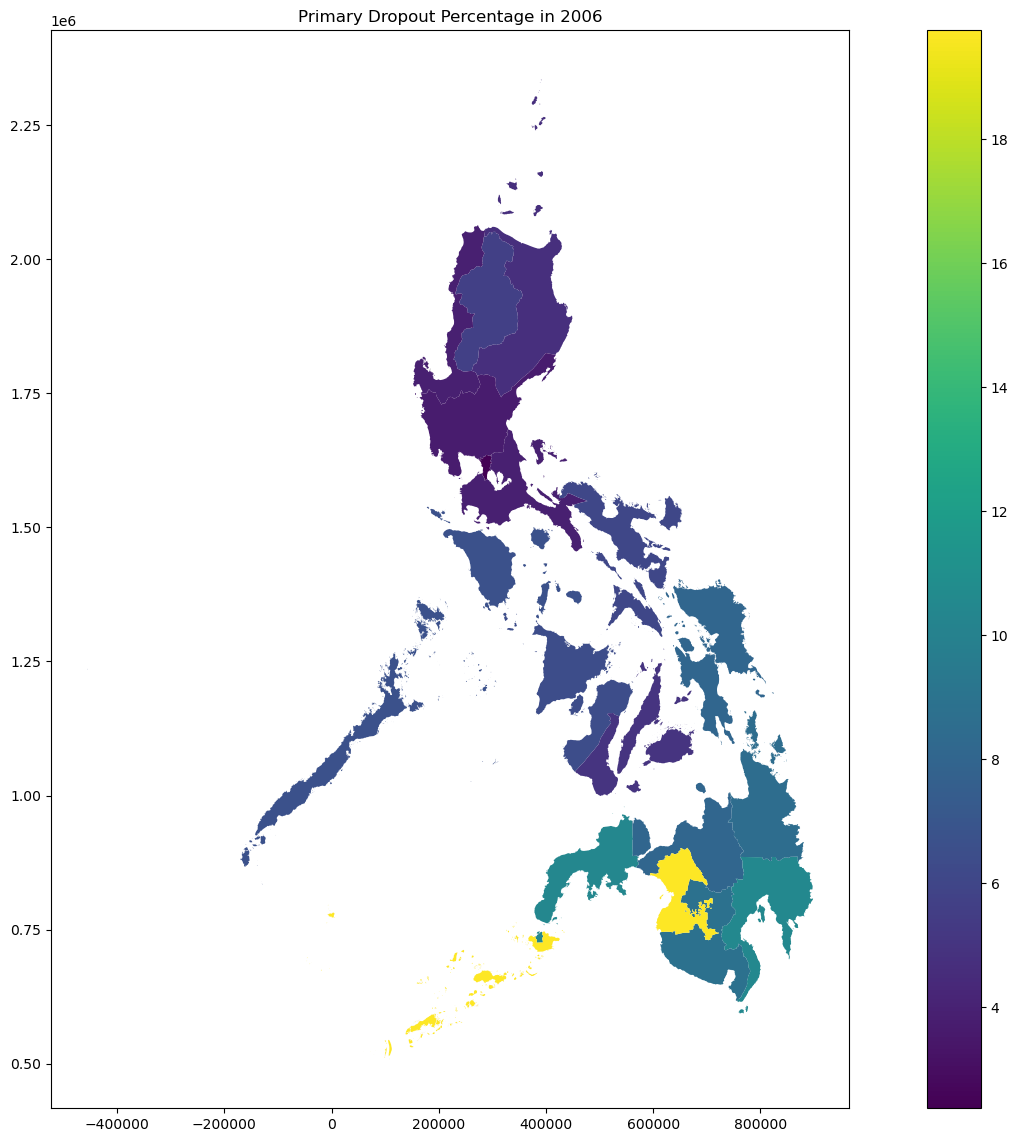

In [43]:
p_dropout_gpd.plot(figsize=(20,14), column='2006', legend=True)
plt.title('Primary Dropout Percentage in 2006')